**Name:Ajinkya Patil**

**D15B,Roll No.:42**

**CA-2**

**Dataset:https://www.dropbox.com/scl/fi/kx2smmnw6d4ih4f5le6bq/ipl.csv?rlkey=6l6mz1ab7rzko9gx07i7qrql6&st=wwdkudfv&dl=0**

#**IPL Score Prediction**

In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np

In [ ]:
# Loading the dataset
df = pd.read_csv('ipl.csv')

# Exploring the dataset

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df.shape

(76014, 15)

In [ ]:
df.dtypes

,0
mid,int64
date,object
venue,object
bat_team,object
bowl_team,object
batsman,object
bowler,object
runs,int64
wickets,int64
overs,float64


In [ ]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


#Data Cleaning

Points covered under this section:

• Removing unwanted columns

• Keeping only consistent teams

• Removing the first 5 overs data in every match

• Converting the column 'date' from string into datetime object

In [ ]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(df.shape))
df.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(df.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [ ]:
df.columns


Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [ ]:
df.head()


,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
df.index

RangeIndex(start=0, stop=76014, step=1)

In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']


In [ ]:
# Keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(df.shape))
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(df.shape))

Before removing inconsistent teams: (76014, 9)
After removing inconsistent teams: (53811, 9)


In [ ]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [ ]:
# Removing the first 5 overs data in every match
print('Before removing first 5 overs data: {}'.format(df.shape))
df = df[df['overs']>=5.0]
print('After removing first 5 overs data: {}'.format(df.shape))

Before removing first 5 overs data: (53811, 9)
After removing first 5 overs data: (40108, 9)


In [ ]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
print("Before converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
print("After converting 'date' column from string to datetime object: {}".format(type(df.iloc[0,0])))


Before converting 'date' column from string to datetime object: <class 'str'>
After converting 'date' column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


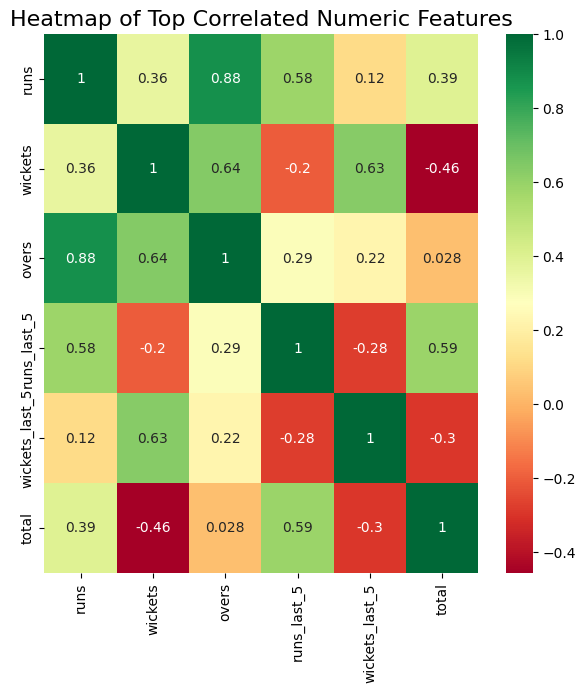

In [ ]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from the dataset
numeric_df = df.select_dtypes(include=['number'])

# Get correlation matrix of numeric features
corr_matrix = numeric_df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(7,7))
g = sns.heatmap(data=numeric_df[top_corr_features].corr(), annot=True, cmap='RdYlGn')
plt.title("Heatmap of Top Correlated Numeric Features", fontsize=16)
plt.show()


#Data Preprocessing

• Handling categorical features

• Splitting dataset into train and test set on the basis of date

In [ ]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [ ]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


#Model Building

I will experiment with 5 different algorithms, they are as follows:

• Linear Regression

• Decision Tree Regression

• Random Forest Regression

----- Boosting Algorithm -----

• Adaptive Boosting (AdaBoost) Algorithm

#Linear Regression

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [ ]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))


---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.118617546193299
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


#Decision Tree

In [ ]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [ ]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 16.92944564434845
Mean Squared Error (MSE): 531.8848092152627
Root Mean Squared Error (RMSE): 23.06262797721159


#Random Forest

In [ ]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [ ]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))


---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.705544242174913
Mean Squared Error (MSE): 325.9821270831293
Root Mean Squared Error (RMSE): 18.054975133827497


**Note:**

 Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm

#AdaBoost Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

# Define the base estimator
linear_regressor = LinearRegression()

# Use AdaBoost with the updated parameter name
adb_regressor = AdaBoostRegressor(estimator=linear_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)


AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

In [ ]:
# Predicting results
y_pred_adb = adb_regressor.predict(X_test)

In [ ]:
# AdaBoost Regression - Model Evaluation
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_adb)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_adb)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_adb))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.158686905807585
Mean Squared Error (MSE): 246.84366547147332
Root Mean Squared Error (RMSE): 15.71125919433173


**Note:**

Using AdaBoost did not reduce the error to a significant level. Hence, we will use simple linear regression model for prediction

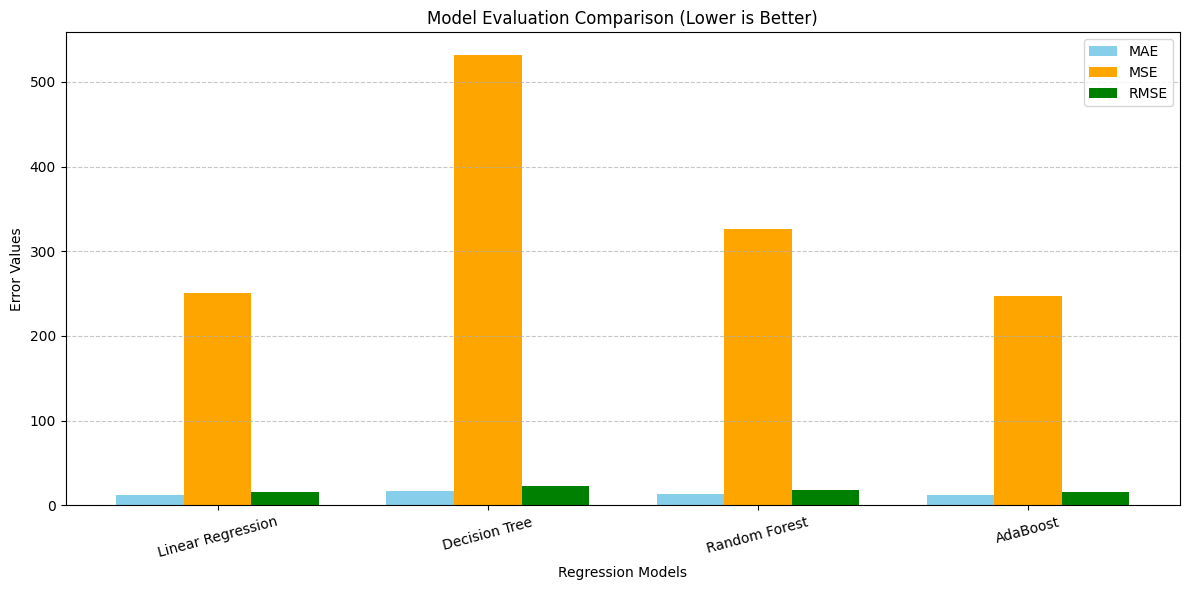

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost']

# Evaluation metrics
mae = [12.12, 16.93, 13.71, 12.16]
mse = [251.01, 531.88, 325.98, 246.84]
rmse = [15.84, 23.06, 18.05, 15.71]

x = np.arange(len(models))  # label locations
width = 0.25  # width of the bars

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width, mae, width, label='MAE', color='skyblue')
plt.bar(x, mse, width, label='MSE', color='orange')
plt.bar(x + width, rmse, width, label='RMSE', color='green')

# Labels and legend
plt.xlabel('Regression Models')
plt.ylabel('Error Values')
plt.title('Model Evaluation Comparison (Lower is Better)')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score

# Define models
linear_regressor = LinearRegression()
decision_regressor = DecisionTreeRegressor()
random_regressor = RandomForestRegressor()
adb_regressor = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100)

# Fit models
linear_regressor.fit(X_train, y_train)
decision_regressor.fit(X_train, y_train)
random_regressor.fit(X_train, y_train)
adb_regressor.fit(X_train, y_train)

# Store in dictionary
models = {
    'Linear Regression': linear_regressor,
    'Decision Tree': decision_regressor,
    'Random Forest': random_regressor,
    'AdaBoost': adb_regressor
}

# Print R² Score (as accuracy)
print("---- R² Score (Accuracy) for Each Model ----")
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: {r2:.4f}")


---- R² Score (Accuracy) for Each Model ----
Linear Regression: 0.7523
Decision Tree: 0.4744
Random Forest: 0.6768
AdaBoost: 0.7554


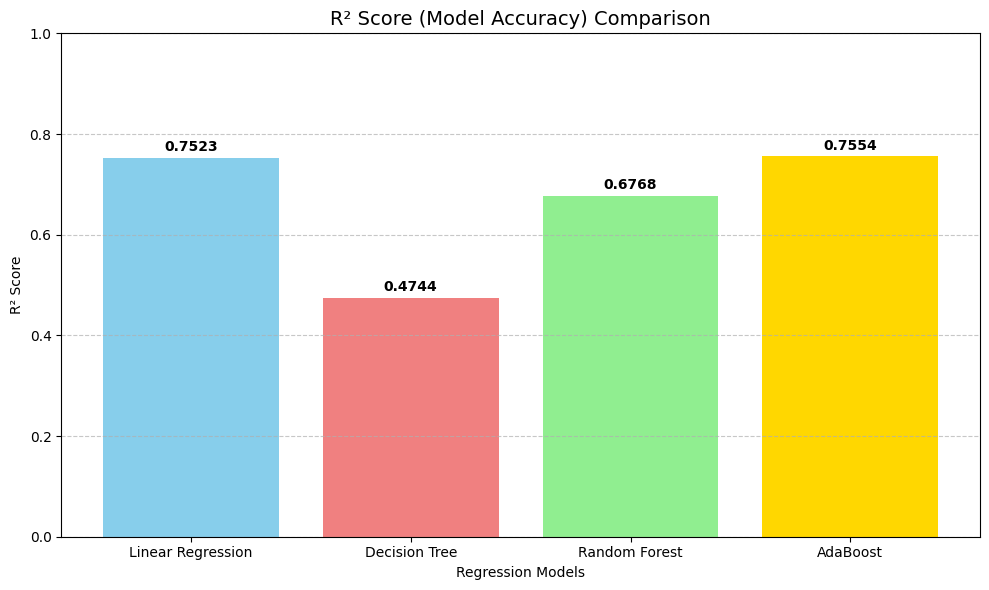

In [ ]:
import matplotlib.pyplot as plt

# Model names and R² scores
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost']
r2_scores = [0.7552, 0.4744, 0.6768, 0.7549]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0, 1)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

# Chart labels and title
plt.title('R² Score (Model Accuracy) Comparison', fontsize=14)
plt.ylabel('R² Score')
plt.xlabel('Regression Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


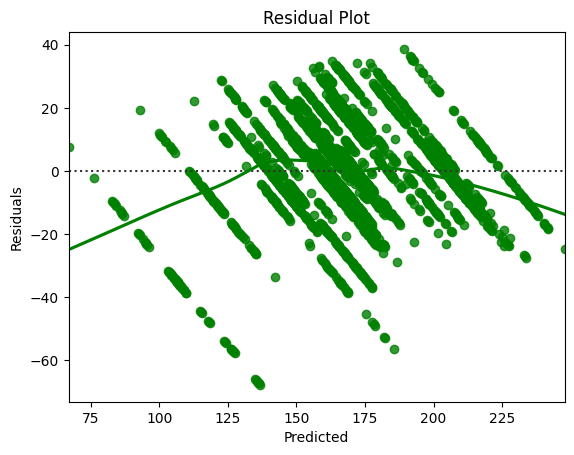

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color='g')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Feature Importance (Tree Models)**

<ipython-input-47-fc339102744a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


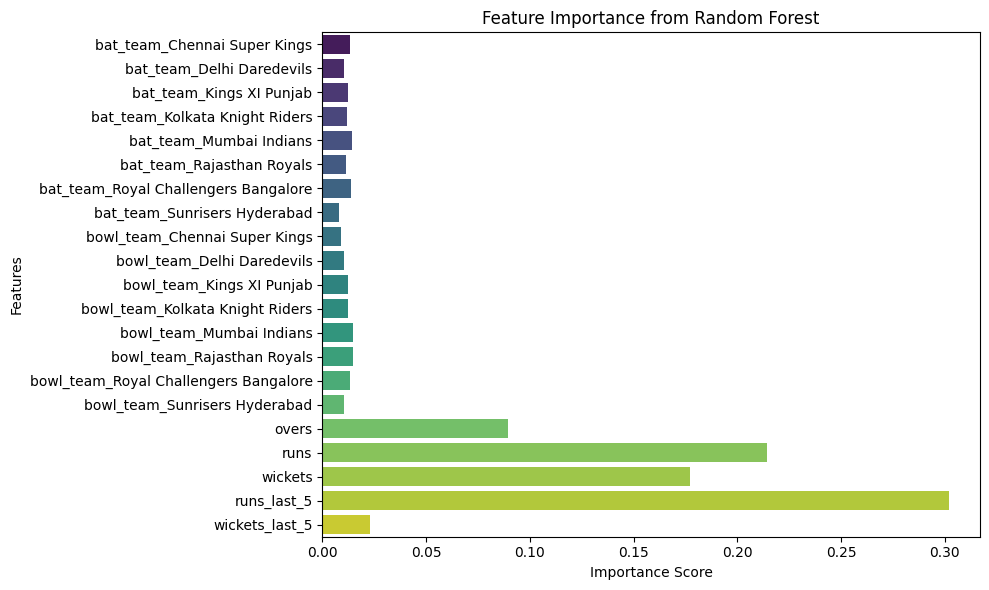

In [ ]:
import pandas as pd

importances = random_regressor.feature_importances_  # or use adb_regressor.feature_importances_
feature_names = X_train.columns

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


**Actual vs Predicted Plot**

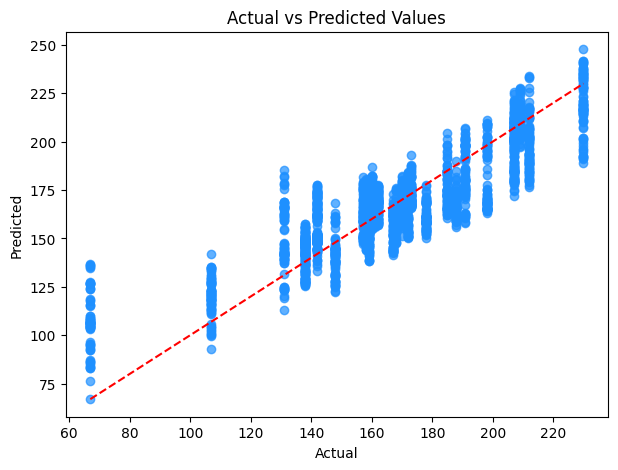

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


# Predictions

• Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)

• Model tested on data from IPL Season 10 ie: (2017)

• Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2019)

In [ ]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(linear_regressor.predict(temp_array)[0])

#Prediction 1

• Date: 16th April 2018

• IPL : Season 11

• Match number: 13

• Teams: Kolkata Knight Riders vs. Delhi Daredevils

• First Innings final score: 200/9

In [ ]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', overs=9.2, runs=79, wickets=2, runs_in_prev_5=60, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 159 to 174


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Prediction 2

• Date: 7th May 2018

• IPL : Season 11

• Match number: 39

• Teams: Sunrisers Hyderabad vs. Royal Challengers Bangalore

• First Innings final score: 146/10

In [ ]:
final_score = predict_score(batting_team='Sunrisers Hyderabad', bowling_team='Royal Challengers Bangalore', overs=10.5, runs=67, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 138 to 153


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Prediction 3
• Date: 17th May 2018

• IPL : Season 11

• Match number: 50

• Teams: Mumbai Indians vs. Kings XI Punjab

• First Innings final score: 186/8

In [ ]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=14.1, runs=136, wickets=4, runs_in_prev_5=50, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 180 to 195


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Prediction 4
• Date: 10th May 2019

• IPL : Season 12

• Match number: 59 (Eliminator)

• Teams: Delhi Daredevils vs. Chennai Super Kings

• First Innings final score: 147/9

In [ ]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Chennai Super Kings', overs=10.2, runs=68, wickets=3, runs_in_prev_5=29, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 137 to 152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
